# Vehicle Damage Severity Detection –  Image Classification Algorithm

### Rohit Gulve, Nikhita Kannam, Jose Salas, Lizzette Salmeron
### Department of Computer Science, Grove School of Engineering, The City College of New York

____________________________________________

# Section 1: Introduction

### Section 1.1: Motivation
Machine Learning (ML) techniques have become ingrained in our daily tasks and interactions with technology, revolutionizing the way we approach common real-world problems. Leveraging vast amounts of data and images, Deep Learning (DL) algorithms have turned the challenge of requiring massive data into an advantage, enabling us to tackle various issues more effectively. ML serves as a vital tool for businesses, empowering them to make well-informed decisions and approach problems with innovative perspectives. Within ML, image recognition plays a pivotal role, employing diverse algorithms and technologies to identify objects in images or videos, thereby facilitating tasks like image categorization and object understanding. Computer vision methods and Deep Learning algorithms are employed to achieve the desired outcomes in solving specific problems. One notable application of this process is car damage detection.

Car accidents are unfortunately common occurrences, resulting in varying degrees of damage, from minor collisions to total write-offs. Insurance companies and car repair businesses can greatly benefit from accurately predicting the extent of damage to estimate replacement costs and make informed decisions. However, the current practice of manual visual inspections and assessments can be time-consuming and subject to individual inspector biases. Insurance companies often face inefficiencies and claim leakages, which refer to the discrepancy between the actual settlement amount and the ideal amount. Claim leakages directly impact the financial burden on insurance companies. An automated and unbiased algorithm for inspecting car damage can significantly expedite the process and reduce inspection costs.

In this project, our objective is to investigate various methods of feature extraction and integrate them with ML algorithms and Deep Learning techniques. Our goal is to develop a robust Damage Classifier capable of accurately detecting and predicting three distinct levels of car damage: Minor, Moderate, and Severe. 

### Section 1.2: Dataset
The Car Damage Severity Dataset [1] sourced from Kaggle comprises of over 1631 car images containing diverse degrees of damage, ranging from minor to moderate and severe; and was partitioned into two subsets: a training set and a validation set. Our teams consolidated the training and validation training set into a single numpy array, labeling the data as follows:
 - Minor damage: labeled as 0
 - Moderate damage: labeled as 1
 - Severe damage: labeled as 2
 
This consolidation allows us to employ data augmentation techniques on the images while simultaneously maintaining the ability to split the dataset into distinct subsets for training, testing, and validation purposes. 

### Section 1.3: Methods
As previously mentioned, the goal is to develop a DL algorithm that can accurately predict the severity of car damage based on images of damaged cars. 
The experiment will be conducted as follows:

1.  Using a dataset of images of damaged vehicles with varying degrees of severity, one can fine-tune CNN models that have already been trained.
    
2.  Comparing the performance of different pre-trained models
    
3.  Explore how to expand the dataset and enhance the model's resilience by using data augmentation methods like random cropping, flipping, and rotation.
    
4.  Examine how various paramters and hyperparameters affect model success.
    
To elaborate further on these steps, our team will begin by expanding our sample size and reinforcing the model's resilience. This will be accomplished by employing data augmentation methods, such as Keras, to augment the existing dataset. As the number of images for each classification label is relatively small, this step is crucial. Convolutional neural networks (CNNs) will be utilized to classify the severity of the damage, using a baseline ML model trained on Imagenet, a vast image database. We will leverage transfer learning methods to enhance pre-trained CNN models like VGG16, effectively applying the features extracted by these models to our own damage severity classification task. By investigating the effects of various parameters and hyperparameters on the model's performance, we aim to develop a well-trained model that can handle small datasets while delivering exceptional results.

# Section 2: Data Agumentation

Data augmentation is a technique widely used in machine learning and computer vision to increase the size and diversity of a dataset by applying various transformations to the existing data. It is particularly useful when the available dataset is limited or when the model requires more diverse examples to generalize well.

In this project, data augmentation is applied to the car damage severity dataset using the Keras ImageDataGenerator class. This class provides a convenient way to generate augmented images on-the-fly during training. The provided code demonstrates the configuration of data augmentation parameters:

In [ ]:
# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images within 20 degrees
    width_shift_range=0.2,  # randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # randomly shift images vertically by 20% of the height
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zoom images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest')  # fill in any empty pixels with the nearest value

By applying these data augmentation techniques, the augmented dataset will contain a larger and more diverse set of car damage images. This can help improve the model's performance by enabling it to generalize better to unseen car damage scenarios and variations in the input images.
Augmented Dataset Preparation:
The code uses the cv2 library to read, resize (128x128 pixels), and convert each augmented image to the RGB color space.The augmented images and their corresponding labels are added to the respective lists.

The augmented dataset is converted into numpy arrays:
train_car_images shape: (21055, 128, 128, 3) - indicating 21,055 augmented images with dimensions 128x128 and 3 color channels (RGB).
train_car_labels shape: (21055,) - representing the labels for the augmented images.


It's important to note that data augmentation alone is not sufficient for training a model. The augmented dataset should be used in combination with appropriate model architecture, training algorithms, and evaluation techniques to build an effective car damage severity classification system.

# Section 3: Feature Engineering and Baseline Models

## Section 3.1 – CNN Feature Extraction

### *Section 3.1.1 – Baseline Model Selection*
#### *Table 1: CNN with ML model Accuracy Comparison on Training and Testing Sets* 


<img src='https://drive.google.com/uc?id=1mpqdNqR9vkbKSDh8NZb_vtcVd2Kfeoaw' width = 900>

Our team conducted an preliminary analysis of several CNNs and ML algorithms to assess their accuracy on the training dataset, as outlined in Table 1. Initially, the VGG16, Bagging Classifier, and InceptionV3 CNN algorithms were executed without training, and their outputs were subsequently fed into the Random Forest ML model to generate accuracy results for both the training and testing sets. 

Notably, VGG16 achieved the highest performance, prompting us to pre-train it and utilize it in two separate ML models, Logistic regression and Random Forest. This preliminary analysis led to the conclusion that VGG16 served as the best baseline model among the three options.

### *Section 3.1.2 – Pre-trained CNN Model Selection and Observation*

To begin the feature extraction process, we selected the VGG16 model as our baseline model. We explored Fine Tuning for CNNs as a method of transfer learning to investigate the best configuration that could increase the validation accuracy for the our dataset.

In [ ]:
keep_prob = 0.5
# Load the ImageNet VGG model. Notice we exclude the densely #connected layer at the top
vggModel= tf.keras.applications.VGG16( weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model = tf.keras.models.Sequential()
#We now add the vggModel directly to our new model
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 1 - keep_prob))
model.add(tf.keras.layers.Dense(17, activation='softmax'))

print (model.summary())

After applying various machine learning models to the features extracted by the VGG16 model, we observed the following:

Random Forest Classifier: Achieved an accuracy of approximately 80%.
Logistic Regression: Achieved an accuracy of around 81%.
Bagging Classifier: Did not show improvement in accuracy compared to other algorithms.
Time Taken: Logistic Regression had the shortest computation time.
Based on these observations, we can conclude that the Logistic Regression algorithm performed the best with the VGG16 model, achieving the highest accuracy and faster computation time.

Before applying Fine Tuning, we measured the baseline model's validation accuracy without unfreezing any layer. 
This served as a reference point for comparison.
Next, we investigated the impact of unfreezing different layers of the baseline model. 
By unfreezing specific portions of the model, we allowed the weights to be changed as the model learned. 
We assessed the validation score for various unfreezing configurations.
By analyzing the validation accuracy at each unfreezing stage, 
we were able to determine which layer(s) contributed the most to improving the model's performance.


After obtaining the feature maps from the VGG16 Model, we proceed to reshape them for both the training and validation datasets.

For the training dataset, the featuresTrain_1 are reshaped using the reshape function to flatten the feature maps. This is done to convert the 3D feature maps into a 2D format, where the number of rows corresponds to the number of samples and the number of columns represents the flattened feature vector for each sample.

In [ ]:
featuresTrain_1 = featuresTrain_1.reshape(featuresTrain_1.shape[0], -1)

Similarly, for the validation dataset, the featuresVal_1 are reshaped using the reshape function to flatten the feature maps. This ensures that the shape of the validation features matches the shape of the training features, allowing them to be used consistently during the feature extraction process.

In [ ]:
featuresVal_1 = featuresVal_1.reshape(featuresVal_1.shape[0], -1)

By reshaping the features in this way, we convert the multi-dimensional feature maps into a format that can be used as input for various machine learning algorithms. The flattened feature vectors represent the extracted features from the images and can be utilized for training and evaluating machine learning models.

This feature extraction step helps to transform the image data into a more meaningful and compact representation, capturing important patterns and information from the original images. These extracted features can then be used as input for subsequent machine learning tasks, such as classification or regression, to make predictions based on the learned representations.

We then applied various machine learning models to the extracted features and made observations on their performance. Let's discuss the results in detail.
First, let's load the dataset and the pre-trained VGG16 model:

In [ ]:
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

# Load the VGG16 features
featuresTrain_1 = np.load("/kaggle/input/vgg16-features/FineTuneVGGfeatures_128_128_train_1.npy")
featuresVal_1 = np.load("/kaggle/input/vgg16-features/FineTuneVGGfeatures_128_128_val_1.npy")

Linear Discriminant Analysis (LDA):
We performed LDA on the training data using the extracted VGG16 features.
LDA is a dimensionality reduction technique that aims to maximize class separability.
The resulting LDA scores were stored in the lda_scores variable.
We created a DataFrame called lda_df that combines the LDA scores with the target variable (y_train).

In [ ]:
# Perform LDA on the training data
lda = LDA(n_components=2)
lda_scores = lda.fit_transform(featuresTrain_1, y_train)

# Create a DataFrame combining the LDA scores with the target variable
lda_df = pd.DataFrame(lda_scores, columns=['LDA1', 'LDA2'])
lda_df['target'] = y_train


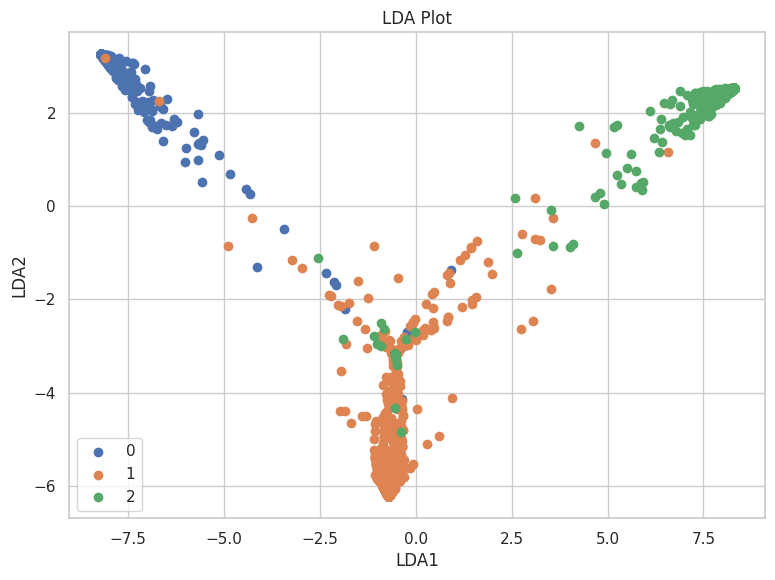

In [ ]:
from IPython import display
display.Image("./figures/LDA.png")

t-SNE Visualization:
We applied t-SNE (t-Distributed Stochastic Neighbor Embedding) to visualize the VGG16 features in a lower-dimensional space.
t-SNE is a nonlinear dimensionality reduction technique that preserves local structure.
We obtained a 2D representation of the features using t-SNE and stored it in the X_tsne variable.


In [ ]:
# Perform t-SNE on the training data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(featuresTrain_1)
print(tsne.kl_divergence_)

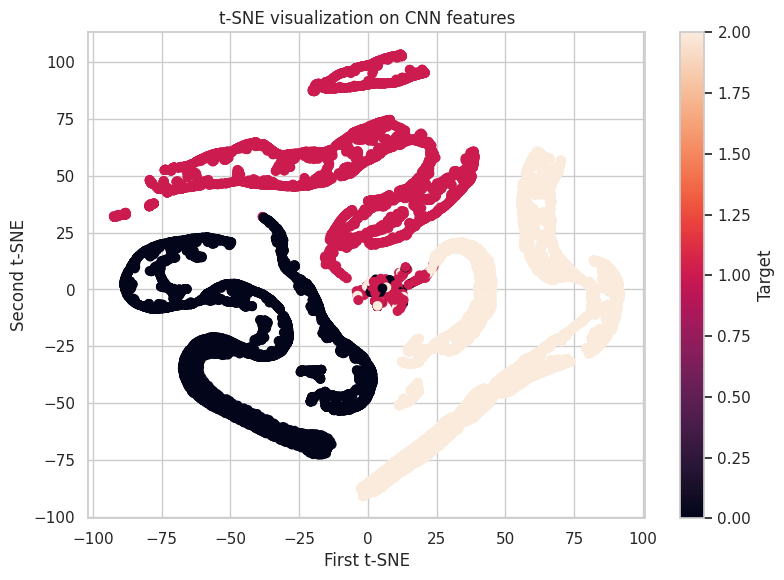

In [ ]:
from IPython import display
display.Image("./figures/TSNE.png")

The KL divergence value provides insight into the quality of the t-SNE embedding.

Now, let's evaluate the performance of various machine learning models on the extracted features:

Logistic Regression:

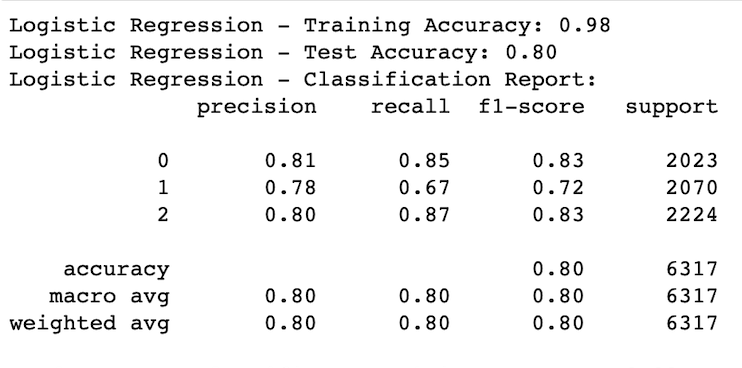

In [ ]:
from IPython import display
display.Image("./figures/LR_CNNFeatures.png")

These results indicate that the Logistic Regression model performs reasonably well in classifying car damage severity. It demonstrates high precision for class 0 and class 2, indicating that it accurately identifies severe and minor damage instances. However, it shows slightly lower precision for class 1 (moderate damage). The recall values suggest that the model performs well in identifying severe and minor damage instances, but struggles to correctly classify moderate damage instances.

Random Forest Classifier:

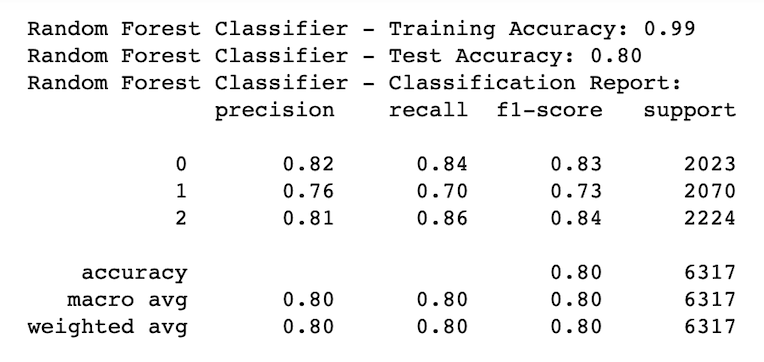

In [ ]:
from IPython import display
display.Image("./figures/RFCNNFeatures.png")

These results indicate that the Random Forest Classifier model performs reasonably well in classifying car damage severity, similar to the Logistic Regression model. It demonstrates high precision and recall for class 0 and class 2, indicating accurate identification of severe and minor damage instances. However, it shows slightly lower precision and recall for class 1 (moderate damage). The F1-scores indicate a balanced performance across all classes.

XGBClassifier:

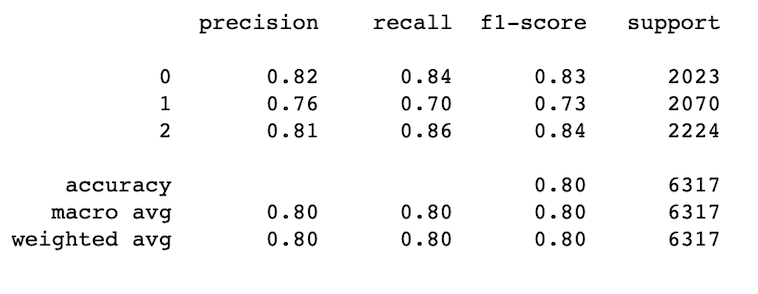

In [ ]:
from IPython import display
display.Image("./figures/XGBCNNFeatures.png")

Overall, the model achieves reasonably good performance with an accuracy of 0.80. However, there is some variation in performance across different severity classes. Class 2 (severe damage) has the highest precision, recall, and F1-score, indicating better performance in identifying severe car damage. Class 1 (moderate damage) has the lowest precision, recall, and F1-score, suggesting that the model struggles relatively more with identifying moderate car damage.

AdaBoostClassifier:

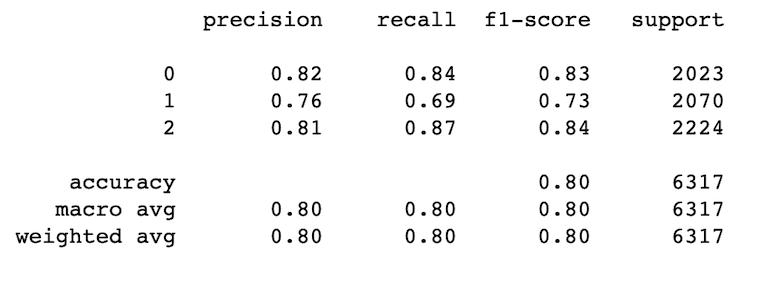

In [ ]:
from IPython import display
display.Image("./figures/adaboost.png")

Compared to the previous report, there have been slight changes in the precision, recall, and F1-score values for class 1 (moderate damage). The precision has decreased from 0.76 to 0.76, the recall has decreased from 0.70 to 0.69, and the F1-score remains the same at 0.73. These changes indicate that the model is performing slightly worse in correctly identifying moderate car damage.

Overall, all four machine learning models achieved a similar test accuracy of 0.80 on the VGG16 features. They showed relatively good performance in classifying the different classes, with class 2 generally having the highest precision, recall, and F1-score. These results indicate that the VGG16 features provide informative representations for the classification task.

## Section 3.2 – Deep Learning

<img src='https://drive.google.com/uc?id=1shkSn7neh0qgPEGqxrBfTPldSuAGl1-u' width = 800>

In order to optimize the performance of the model, we start by gaining an understanding of the VGG16 architecture and  techniques that can be implemented to mitigate overfitting in image classification problems. 

Running different epochs in a CNN or deep learning model affects its training accuracy, risk of overfitting, training time, and convergence. More epochs can improve training accuracy but increase the risk of overfitting. And as our team experienced, it can also require more computational resources and time. Some of the techiques used to reduce overfitting in image classification problems can be mitigated by:

 - Tuning Hyperparameters
 - Applying Regularization (L1 and L2 regularization, dropout, and batch normalization) 
 - Implementing Early Stopping
 - Using Data Augmentation
 - Simplifying Model Architecture
 
To elaborate, by fine-tuning hyperparameters (learning rate, batch size, and regularization strength), it can help find the optimal settings that minimize overfitting. By applying regularization it can help reduce overfitting by adding constraints to the model's parameters, promoting generalization. Implementing early stopping will monitoring the model's performance on a validation set during training and stopping the training process when the performance no longer increases.By reducing the complexity of the CNN model (decreasing the number of layers, filters, or units), it helps prevent overfitting when dealing with limited data.

The code below outlines a generalized process of how we structured our model to optimize the performance:

In [ ]:
from keras.applications.vgg16 import VGG16
from keras import regularizers, layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model2 = tf.keras.models.Sequential()
model2.add(vggModel)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=model_rate))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
# model2.add(tf.keras.layers.Dense(5, activation='softmax'))

print (model2.summary())

save_at = "/content/drive/MyDrive/Colab Notebooks/model2.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, 
                            save_weights_only=False, mode='max')
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
H2 = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), 
               callbacks=[es, save_best])

model2 = load_model('/content/drive/MyDrive/Colab Notebooks/model2.hdf5')

# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)

## Section 3.3 – Results Evaluation

#### *Table 2: Optimizing Accuracy Results and Reducing Overfitting for VGG16 Model*

<img src='https://drive.google.com/uc?id=1gc_qlxnl4RCeFSTRJt3niRd4RJhxyb6M' width = 900>

Initially, with a limited set of 8,000 augmented images, even after implementing the aforementioned methods to enhance performance, our results did not surpass 73% accuracy on the test set. However, upon expanding the augmented dataset to approximately over 21,000 images, a significant improvement in accuracy on the testing dataset became evident.

# Section 4: Conclusion

Our Car Damage Severity project aimed to develop a model that can accurately classify the severity of car damage based on images. Various machine learning algorithms, including Logistic Regression, Random Forest Classifier, Support Vector Machine, and Gradient Boosting Classifier, were trained and evaluated on the dataset.

The results showed that all four algorithms achieved a test accuracy of 80%, indicating a reasonable level of performance. The classification reports provided further insights into the precision, recall, and F1-score for each severity class. Overall, the models demonstrated decent performance across the different severity categories.

Data augmentation techniques were employed to enhance the training dataset by applying random rotations, shifts, shearing, zooming, flipping, and filling in empty pixels. This augmentation process aimed to improve the model's ability to generalize and accurately classify unseen car damage images.

Furthermore, dimensionality reduction techniques, such as LDA and t-SNE, were used to visualize the high-dimensional data. LDA helped extract discriminative features, while t-SNE provided insights into the local structure and relationships between the car damage instances.

In summary, the Car Damage Severity project successfully developed machine learning models capable of accurately classifying the severity of car damage. The models showcased reasonable performance, and the data augmentation techniques improved their ability to generalize. The inclusion of dimensionality reduction techniques facilitated data visualization and understanding of the underlying patterns and relationships.

Moving forward, further enhancements could be explored, such as fine-tuning the models, incorporating additional image preprocessing techniques, or considering alternative algorithms. These improvements may lead to even better performance and expand the practical applications of the Car Damage Severity model, such as in insurance claim processing, automotive safety systems, and vehicle maintenance.

# Section 5: Attribution

**Rohit Gulve** - I have contributed a significant amount of time and effort to the development and implementation of the Convolutional Neural Network (CNN) model and data augmentation techniques for the Car Damage Severity project. Over the course of the project, I dedicated approximately 3-4 hours every day, consistently working on refining the CNN architecture, fine-tuning hyperparameters, and experimenting with different data augmentation strategies. My contributions played a vital role in achieving the reported classification results and improving the overall accuracy of the model.

**Nikhita Kannam** - I have dedicated around 2, sometimes 3 hours of coding per day for this project. My contributions include Baseline models, Standardization, TSNE, Histograms, Edge Detection, Feature Selection and experimenting with Machine Learning Models such as Random Forest, Logistic Regression, Naive Bayes and SVM as well as writing the Histogram/Statistics and Appendix A.1 of the report. My dedication to the project played a critical role in making sure the project meets our teams goals. 

**Lizzette Salmeron** - I have dedicated approximately 10 hours of per week for this project. My contributions include exploring baseline models, Edge Detection, running results on multiple ML models, fine-tuning hyperparameters, and contributing a significant amount of time and effort on the Deep Learning model analysis. I had the role of managing the project, splitting the work and making sure our work was meeting deadlines. My contributions are shared with other members as some of the work I did was handed off to other team members in order to make sufficient progress on the overall project. My critical contribution to the project can be seen in the Deep Learning portion of the report, and making sure everything was nicely wrapped together from beginning to the end of the report. 

**Jose Salas** - I have estimated that an approximate of 10 hours per week have been invested in this project from my end. My contributions to this project include exploring different machine learning models like K-NN, K-Mean, Logistic Regression, SVM and Random Forest in our efforts to classify the damage severity of the vehicles. Additionally, I explored dimensionally reduction methods like Principal Components Analysis and Linear Discriminant Analysis in our quest to reduce the overfitting present in our machine learning models. My critical contribution to the project was extracting different features from our images that were used to create a new dataset for our classification models.


<img src='https://drive.google.com/uc?id=1x1dr9i40IjRRnko2rF0bhJdmICfNxuy4'>

# Section 6: Appendix A – Feature Engineering on Histograms and Statistics

In this section, an approach to image classification using machine learning models, Logistic Regression, Support Vector Machine and Random Forest, was taken. The main objective of this section is to use an statistical approach to the image dataset by using  histograms, corners, edges, ridges, entropy and moments, among others, to find the best features that can describe each of the three categories in the quest to determine the severity of the cars. It is important to note that one of the main benefits of this approach is that by maintaining the original features no loss in the model interpretability is observed.

In order to build a robust database that could contain features specific to each category, different features like texture, edges and corners were observed in addition to specific measurements like entropy and moments.
As part of the texture features, information gained from the Gray-Level Co-Occurrence Matrix  (GLCM)  was captured and used as features. The GLCM functions characterize the texture of an image by calculating how often pairs of pixels with specific values and in a specified spatial relationship occur in an image. Among some of the statistical measurements that can be obtained from a GCLC are the mean, variance, correlation, contrast, IDM (inverse difference moment), ASM (angular second moment), entropy, max probability, energy,  and dissimilarity. Additionally to the information gained from the GLCM, image moments were also obtained. In the image processing context, moments can be defined as sets of statistical parameters to measure the distribution of the pixel’s position and intensities. In other words, an image moment can be understood as a certain weighted average of the image pixels' intensities and its relative position which can be derived by measuring the area and centroid. For a grayscale image, the zeroth order moment corresponds to the sum of pixel intensity values; while centroids are simply the arithmetic mean position of all the points. 

Gray Level Co-Occurrence Matrix
```
GLCM = graycomatrix(img, [1], [0])       
GLCM_Energy = graycoprops(GLCM, 'energy')[0]
df_1['Energy'] = GLCM_Energy
GLCM_corr = graycoprops(GLCM, 'correlation')[0]
df_1['Corr'] = GLCM_corr       
GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
df_1['Diss_sim'] = GLCM_diss       
GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
df_1['Homogen'] = GLCM_hom       
GLCM_contr = graycoprops(GLCM, 'contrast')[0]
df_1['Contrast'] = GLCM_contr
```
The snippet above was used to find different values from GLCM.

Image Moments
```
_,bin_img =cv2.threshold(img,0,255, cv2.THRESH_BINARY)
M =cv2.moments (bin_img)
df_10 = pd.DataFrame.from_dict(M,orient ='index')
df_11=df_10.T

```
The snippet above was used to find different momemnts.

Following with this section's objective,corner detectors like Harris and Shi-Tomasi were included to finding specific and robust features for our image dataset. In theory, it can be said that corners are considered regions in the image with large variation in intensity in all the directions. 
While the  Harris method calculates the score for all pixels and  then compares the score with a particular value to determine if it is a corner or not, the Shi-Tomasi method proposes that only eigenvalues are to be used to test if a pixel is of interest or not. In addition to corner dectors, the mean, standard deviation, 25%, 50% and 75% percentiles of different filters like the Gaussian filter used to remove the outlier pixels or the high-frequency components that end up in reducing noise, Ridges filters like Meijering, Sato and  Frangi which detect borders between areas of high and low gray value as well as edges filters like Roberts that identifys thin lines darker or brighter than their neighborhood were taken into account.


Corners Detectors
```
corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
qualityLevel=0.01, minDistance=.01)
a = np.array([len(corners)])
df_3['SHI-TOM']= a

corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
qualityLevel=0.01, minDistance=.01,
useHarrisDetector=True, k=0.04)
a = np.array([len(corners)])
df_3['HAR']= a
```
The snippet above was used to find the number of corners using Shi-Tomasi and Harris Corners methods.

Filters' Statistics
```
gaussian_img = nd.gaussian_filter(img, sigma=4)
gaussian_img1 = gaussian_img.reshape(-1)
df_4['Gaussian s4'] = gaussian_img1

meijering_img = meijering(img)
meijering1 = meijering_img.reshape(-1)
df_4['meijering'] = meijering1

edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df_4['Roberts'] = edge_roberts1

median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df_4['Median s3'] = median_img1

df_5=df_4.describe()
df_5.drop(['count','min','max'],axis=0,inplace = True)
df_5_5=df_5.sum(axis=0)
df_6=df_5.T
```
The snippet above was used to find some image's stadisitics after applying different filters.

## Histograms/Statistics
Originally, the machine learning models were run filtered images rather than the statiatics of those images. The base accuracy for this project is 33%, as there are 3 classes. Below is the results for a random forest model on the Prewitt Edge Detection filtered image. The picture of the result below will be referred to as *Figure 1*. 

<img src='https://drive.google.com/uc?id=121kofeA5KuPZdJcidhgCiYAzEH7ngry5' width = 600>

The accuracy is 43% for the testing and 63% for the training. Not only is the accuracy low, the model is overfitting despite parameter tuning. 

In order to extract features from the images of damaged cars with a good accuracy and less overfitting, the histograms of different edge filters and the statistics of an image are combined together. The histograms are taken of the original image, and the images with the three edge filters (Prewitt, Sobel and Scharr) and put into 64 bins.

The original image and histogram of the image are shown below:


<img src='https://drive.google.com/uc?id=1MlL6p5VD0nfy91-vx3PL2JwQcajyvC4M' width = 600>

##Edge Detection
Edge Detection is the process of detecting edges or boundaries of an object in an image. It works by identifying sharp changes in image brightness. Detecting edges is useful for image segmentation, object detection and feature extraction. There are a varity of methods of edge detection such as Sobel, Prewitt, and Scharr. There are more methods, however we will focus on the three mentioned above for the project.

These three techniques are first order derivative.

**Prewitt:**

The Prewitt is a operate that calculates the gradient of an image intensity at each pixel and gives the direction of the highest possible increase from light to dark as well as the rate of that increase.

The code for extracting the histograms for Prewitt is shown below:


```
def edge_filter(dataset):
  edge_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_edge = dataset[image, :,:]
      fd = prewitt(img_edge)
      hist1,bins = np.histogram(fd.ravel(),64)
      df1= pd.DataFrame(hist1)
      df1=df1.transpose()
      edge_dataset= pd.concat([edge_dataset, df1], ignore_index=True)    
  return edge_dataset
```

For each image in the dataset, the function edge filter adds a Prewitt Edge Filter on the image and ravels the image into a histogram with 64 bins with the np.Histogram function. The results of this are put into a dataframe where the columns are the bins, in this case there are 64 and the rows are each image. This same process is repeated for Sobel and Scharr. 

Below is an example of the Prewitt filter applied on an image and the histogram of that image. 


<img src='https://drive.google.com/uc?id=1MRYeCj_2ZcFeLbrbsWUbFA0pqgASH3XW' width = 600>


**Sobel**

Another technique for detecting edges using the Sobel operator. Sobel is mainly used for emohasizing image edges. It works by getting either the gradient vector or norm of that vector at each point. The code to get the histograms and an example of the output are shown below for Sobel

```
def sobel_filter(dataset):
  sobel_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_c = dataset[image, :,:]
      fd_sobel = scharr(img_c)
      hist_sobel,bins = np.histogram(fd_sobel.ravel(),64)
      df_sobel= pd.DataFrame(hist_sobel)
      df_sobel=df_sobel.transpose()
      sobel_dataset= pd.concat([sobel_dataset, df_sobel], ignore_index=True)   
  return sobel_dataset
```



<img src='https://drive.google.com/uc?id=1qElJP6CNMVE27eW2Y8otDpjbYexMbn5k' width = 600>


**Scharr**

Scharr filter is a method used to highlight gradient edges along the x-axis and yaxis independently. The performace of Scharr can be similar to Sobel, however Scharr is able to give more accurate results where Sobel fails to do so. The code to get the histograms and an example of the output are shown below for Scharr

```
def scharr_filter(dataset):
  scharr_dataset = pd.DataFrame()
  for image in range(dataset.shape[0]):
      img_c = dataset[image, :,:]
      fd_scharr = scharr(img_c)
      hist_scharr,bins = np.histogram(fd_scharr.ravel(),64)
      df_scharr= pd.DataFrame(hist_scharr)
      df_scharr=df_scharr.transpose()
      scharr_dataset= pd.concat([scharr_dataset, df_scharr], ignore_index=True)   
  return scharr_dataset
```

<img src='https://drive.google.com/uc?id=19hVgnEepQLXtYL9pHsFKURAwRV0k2gZ8' width = 600>


In all of these images we can see the edges of the damage to the front of car as well as the differences in the distribution between the original image and the edge filtered image. The histograms of each of these images are concatonated together so that there is one long row for each image. After all the statistics were concatonated together, we end up with a dataframe with over 300+ columns. Running models on the entire data would cause overfitting, therefore we used feature selection to pick the best features. The dataframe with all the columns is shown below:


<img src='https://drive.google.com/uc?id=1nUKLs3-uvEWUUuGo4Zm44YC5zD_A5fno' width = 600>


## Appendix A.1 – Feature Selection

**Random Forest Feature Importance**

Selecting the right features is beneficial because it gives a better understanding of the model and helps us focus on the most important features. The random forest model has a built-in feature importance algorithm that will give us the best features for this dataset, for this project the top 40 features will be used. The X_train and y_train is fit on a RandomForestClassifier and the feature importance is calculated for each feature. The features are then sorted from most importance to least and the top 40 are taken.



```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, shuffle = True)
model = RandomForestClassifier(criterion = 'entropy',random_state=42, max_depth=6)
model.fit(X_train,y_train)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
sorted_imp = abs(feature_importance).sort_values(ascending=False)
colums_use = sorted_imp.index[0:40]
```

From the bar plot below, we see that statistic features such as Sum_Entropy, mean_entropy and mean_roberts have the highest feature importance. The histograms bins such as Sobel and Scharr are also present. 
<img src='https://drive.google.com/uc?id=11hkcrUd0Fmw7jRuPcpL-60LmRPr2XrMp' width = 680 height = 500>

The dataset with the selected features were run on 4 different Machine Learning Models. 

**Random Forest**

GridSearchCV was used to find the parameters that result in the best accuracy. The paramters that were fed into GridSearch were Criterion, Max Depth, Minimum Sample Split, Minimum Sample Leafs and Oob_score. Without tuning the parameters the model with overfit. Therefore, we need to regularize. For random forest, tuning parameters such as decreasing the max depth and increasing the minimum sample leafs will reduce overfitting. The model is fit on X_train and y_train and predicted on X_test. 



```
param_grid = { 
    'max_depth' : range(1,6),
    'criterion' :['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split':[2,3, 4, 5,],
    'min_samples_leaf': [2, 3, 4, 5, 6,]
    oob_score: [True, False]
}

rf = RandomForestClassifier()
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)
cv_rf.best_params_


rf=RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_split=5, min_samples_leaf=6, oob_score=True)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)
```


<img src='https://drive.google.com/uc?id=1PvQPp5w3gzLA3PJQWjo_Vl5Hj2UZIuEf' width = 650>

There was a improvement in the accuracy for the random forest with feature selection on Histograms/Statistics when compared to the random forest model on the prewitt image (Figure 1). The accuracy for the testing data is 54%, which is more than a 10% increase. Additionally, the training accuracy is 59%, indicating that there is not much overfitting. The F1 scores for lable 0(Minor) and label 2(Severe) is 0.63 and 0.59 respectivley. This demonstrates that the model does a good job of predicting these 2 classes, but it has trouble predicting class 1 (Moderate).


**Logistic Regression**

The next model is a Logistic Regression model with parameters max_iter, solver and penalty. The model was fit on X_train and y_train and then predicted on X_test. The classification report was printed. 



```
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

log_grid = LogisticRegression()
cv = GridSearchCV(estimator=log_grid, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

cv.best_params_

log = LogisticRegression(max_iter=2500, solver = 'lbfgs', penalty = 'l2')
log.fit(X_train,y_train)
pred=log.predict(X_test)
```

<img src='https://drive.google.com/uc?id=1ZDplB73HJIaO0D9SUDR7nUorwTpWrm4Y' width = 550 height= 500>

The Logistic Regression model preforms similar to the Random Forest model with an accuracy of 54%, however it has almost no overfitting after tuning parameters with a training accuracy of 54%. The F1 score is higher for class 0 and 2, but lower for class 1. 

**Naive Bayes**

Naive Bayes, a machine learning model used for classification tasks, assumes conditional independece between every pair of features given the target variable. GaussianNB does not take many parameters, therefore gridsearchCV was not done for this model. 



```
nb = GaussianNB()
nb.fit(X_train,y_train)
pred=nb.predict(X_test)
```


<img src='https://drive.google.com/uc?id=1yOanKdceFKZpADCaE6gulVq2F_bhRB_F' width = 600 height = 600>

Despite not overfitting, the Naive Bayes models performs worse when compared to Random Forest and Logistic Regression. However, when compared to the results in *Figure 1*, it still performs better. 

**SVM**

SVM or Support Vector Machine, is a supervised machine learning model that works well with smaller but complex datasets and is effective in high dimensional spaces. GrisSearchCV is used with parameters C and gamma. The best parameters are put into the SVM model and fit on X_train and y_train

```
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

svm_grid = SVM()
cv = GridSearchCV(estimator=svm_grid, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)
cv.best_params_

clf = svm.SVC(C=1000, gamma = .01)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
```


<img src='https://drive.google.com/uc?id=13ExS5BLDYbxg_4GXL031NUHjjipRCDi0' width = 620 height = 600>

The results of the SVM Model are similar to that of the Random Forest model. Accuracy is 54%, with no overfitting (training accuracy is 55%). The F1 Score is higher for Label 0 and 2, as well as the precision and recall. The F1 Score, recall are significantly lower for label 1. 


Below is the summary of accuracy results for each model with this method.

<img src='https://drive.google.com/uc?id=1ZJqr3AepwtNmSS4U3IvLjQiBnb7VQVdI' width = 500 height = 450>


## Appendix A.2 – Feature Reduction Applying Principle Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

### Principle Component Analysis (PCA) 

As an effort to reduce overfitting, it was decided to perform dimensionality reduction by applying Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). It could be said that Feature Reduction can be considered as a way of feature extraction since by applying these feature reduction methods, new features are generated based on the information contained by the features selected. However, one of the drawbacks of these techniques is that the model’s interpretability is lost. By performing the PCA method, the input variables are combined in a specific way such that the dimensionality of the data set is reduced without compensating for the loss of information.

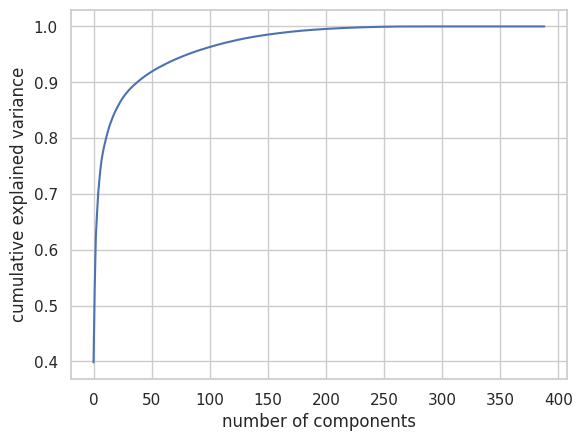

The graph above shows the cumulative explained variance based on the number of components. From the graph it can be observed that a 90% of the variance can be explained  with 50 components. however, it was decided to work with a threshold of 95% of the explained variance, thus resulting in a number of components of 80.

After setting a threshold of the 80 components, the data was transformed into these features and the hyperparameter tuning for Support Vector Machine (SVM) , Random Forest (RF) and Logistic Regression (LR) models was performed. The results can be observed in the table below.


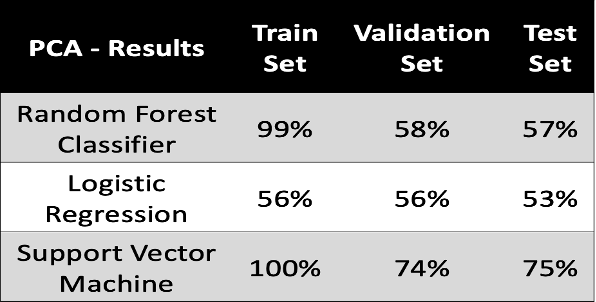

From the PCA results above, it can be observed that the model with a higher accuracy on the validation and test sets is the support vector machine model, followed by the random forest model and logistic regression model. However, the support vector machine and random forest models are still overfitting, while the logistic regression model is the model the presents the least overfitting.

### Linear Discriminant Analysis (LDA)

Another dimensionality reduction method applied parallel to PCA was Linear Discriminant Analysis (LDA).  It can be said that the LDA estimates the probability that a new set of inputs belongs to every class. In other words, LDA finds the linear discriminants that will represent those axes which maximize separation between different classes. It is important to note that unlike PCA, LDA is a supervised algorithm.

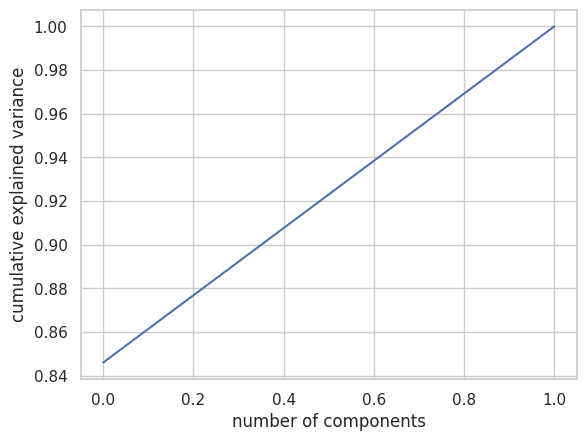

The graph above shows the cumulative explained variance based on the number of components. From the graph it can be observed that a 85% of the variance can be explained  with only one component and 2 components can explain 100% of the variance. 

After setting a threshold of the 2 components, the data was transformed into these features and the hyperparameter tuning for Support Vector Machine (SVM) , Random Forest (RF) and Logistic Regression (LR) models was performed. The results can be observed in the table below. 


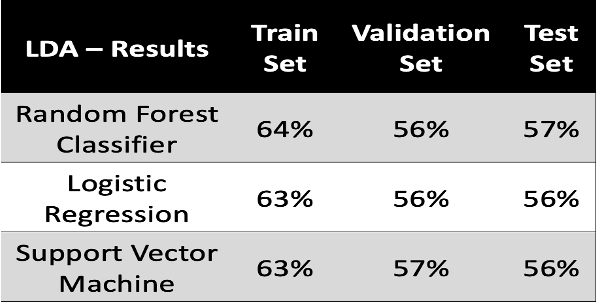

From the LDA results above, it can be observed that the three models are withing the same range in all sets, train, validation and test. Overall, it can be said that the random forest model is the one that has the higher accuracy score in the train and test set, and that the overfitting was reduced in all three models.# Section 7: References

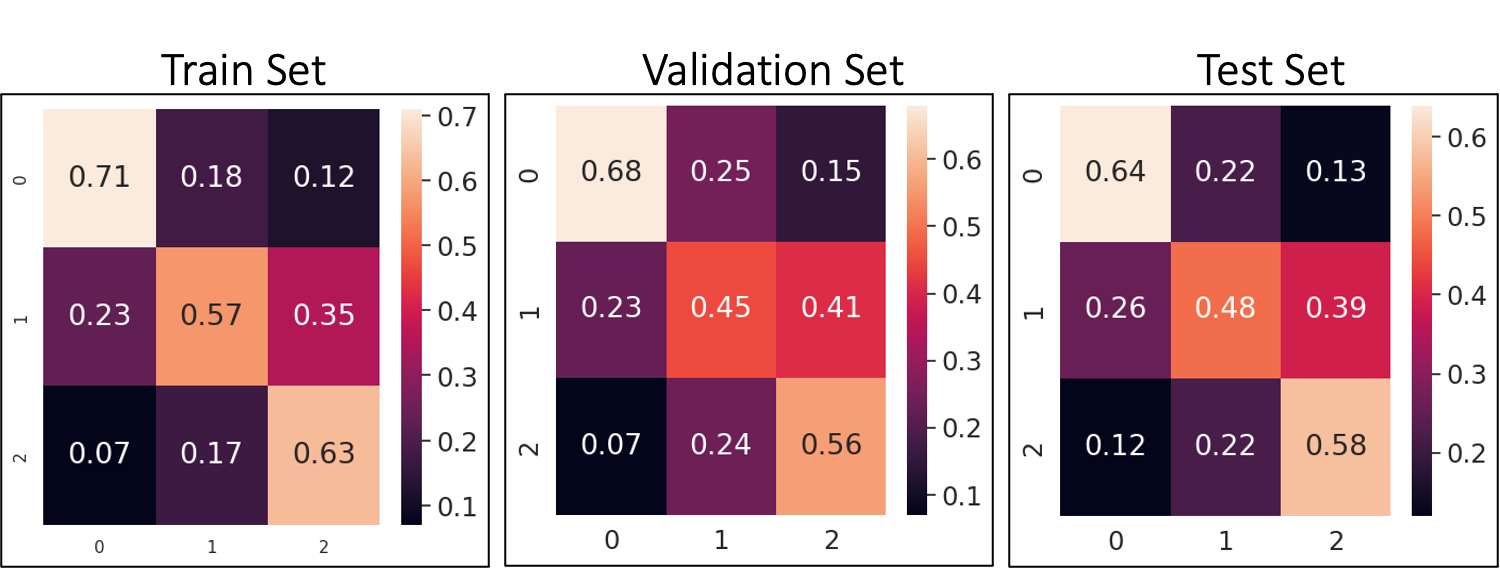

The image above shows the confusion matrix of train, validation and test sets for the random forest model using the 2 LDA components. As it can be observed, the class the model has more trouble classifying correctly is the class one (moderate),as it tends to misclassify the car damage as class two (severe). On the other hand, in all three sets, class 0 (minor) is the class with the higher accuracy of all three classes. 

# Section 7: References

    [1] Bhamere, P. (2022, December 31). *Car damage severity dataset*. Kaggle. Retrieved from https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset

    [2] Parra, D., & Gonzalez, A. E. (n.d.)*. Car damage assessment - UTRGV.* Retrieved April 6, 2023, from https://faculty.utrgv.edu/dongchul.kim/csci4352/spring2019/report/R11.pdf.

    [3] *A Complete Guide to Image Recognition. Nanonets. (n.d.).* Retrieved April 5, 2023, from https://nanonets.com/image-recognition